# Get data and import packages

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

File ‘all_stocks_5yr.csv’ already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Select a company

In [4]:
data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<Axes: >

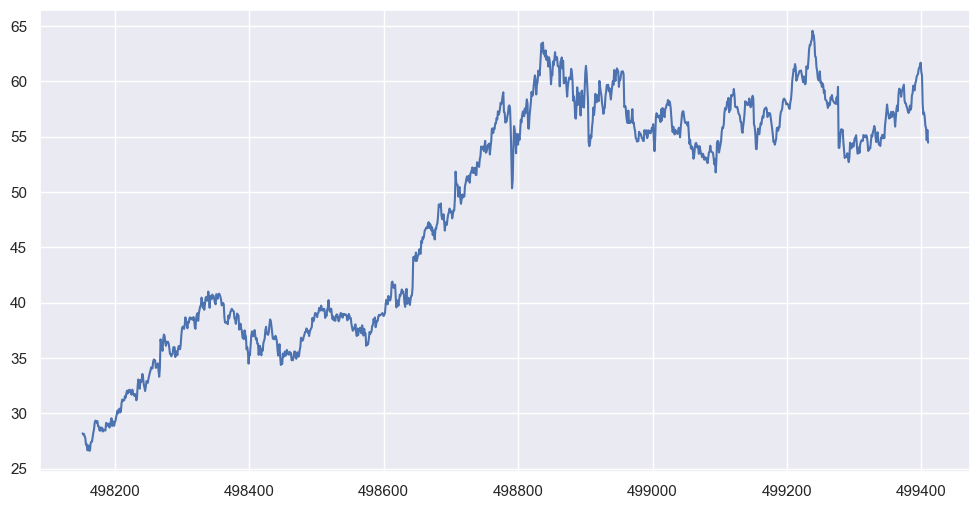

In [6]:
sbux['close'].plot(figsize=(12, 6))

# Calculate the returns

In [7]:
sbux['prev_close'] = sbux['close'].shift(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [8]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1
# Can also calculate this as:
# sbux['return'] = sbux['close'].pct_change(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


0.0006002332205830914 0.012360934026133879


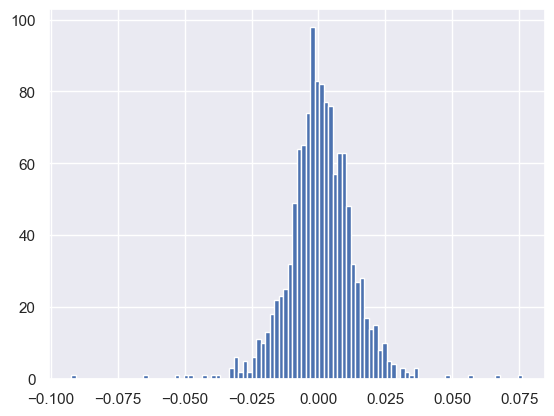

In [11]:
sbux['return'].hist(bins=100);
print(sbux['return'].mean(), sbux['return'].std())

In [15]:
sbux['log_returns'] = np.log(sbux['return'] + 1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,log_returns
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005028


0.0005235902748108682 0.012381234216101258


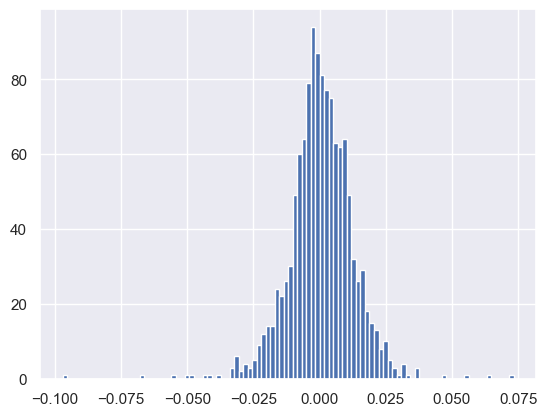

In [17]:
sbux['log_returns'].hist(bins=100);
print(sbux['log_returns'].mean(), sbux['log_returns'].std())

# Normal Distributions and QQ Plots

In [19]:
from scipy.stats import norm, probplot
import statsmodels.api as sm

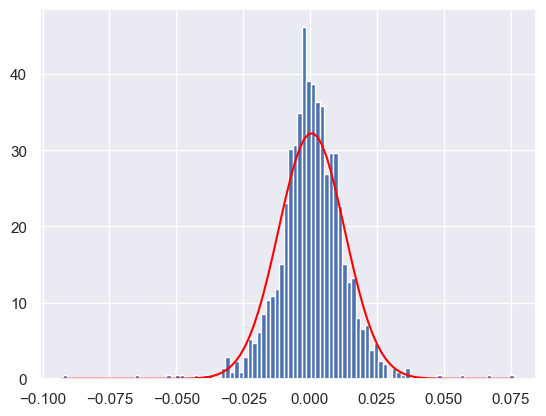

In [20]:
# Generate a normal distribution
x = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
y = norm.pdf(x, loc=sbux['return'].mean(), scale=sbux['return'].std())

# Plot the histogram
sbux['return'].hist(bins=100, density=True)
plt.plot(x, y, color='red')

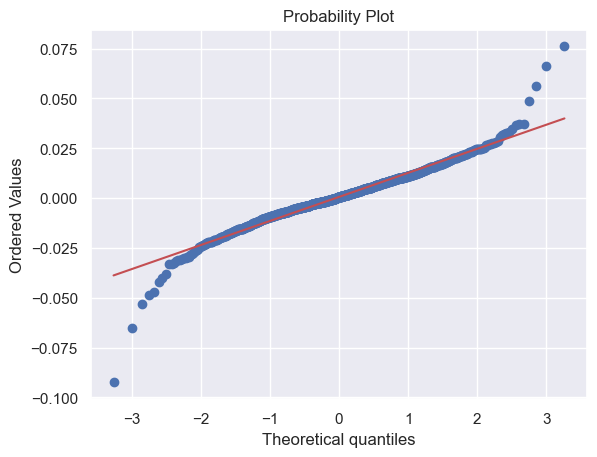

In [22]:
# Plot the QQ-plot
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

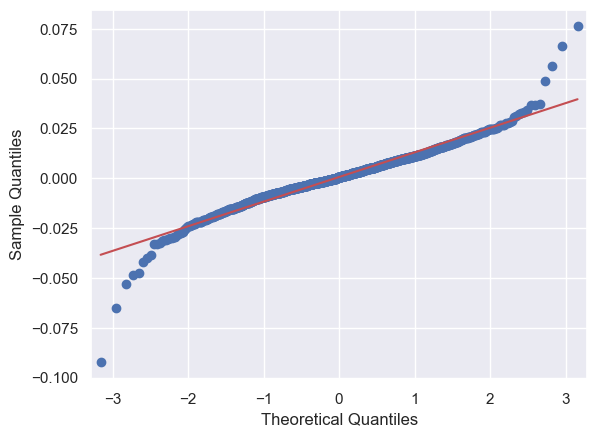

In [23]:
# Plot the QQ-plot with StatsModels, line=s means that line is standardised
sm.qqplot(sbux['return'].dropna(), line='s');

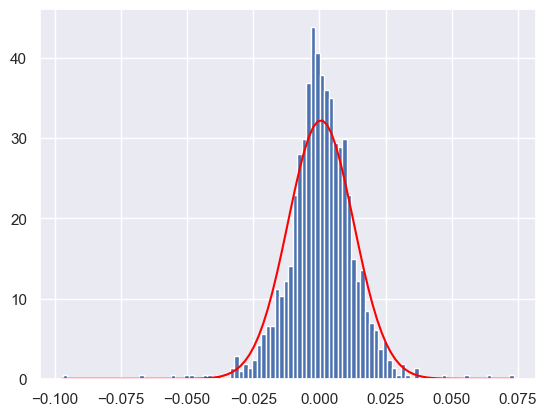

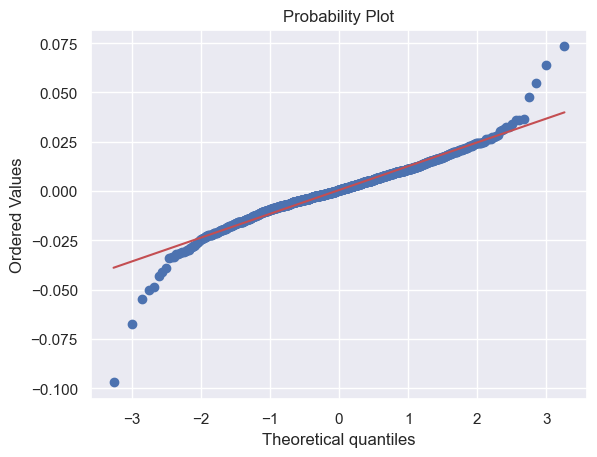

In [26]:
# Let's use the log returns instead

# Generate a normal distribution
x = np.linspace(sbux['log_returns'].min(), sbux['log_returns'].max(), 100)
y = norm.pdf(x, loc=sbux['log_returns'].mean(), scale=sbux['log_returns'].std())

# Plot the histogram
plt.figure()
sbux['log_returns'].hist(bins=100, density=True)
plt.plot(x, y, color='red')

# Plot the QQ-plot
plt.figure()
probplot(sbux['log_returns'].dropna(), dist='norm', fit=True, plot=plt);


# t-Distributions

In [28]:
from scipy.stats import t as student_t

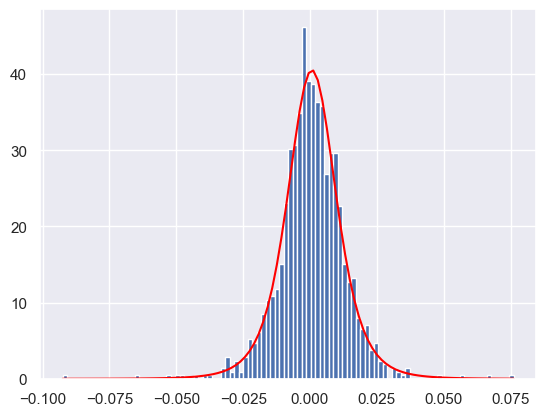

In [29]:
# Generate a t-distribution
x = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)

params = student_t.fit(sbux['return'].dropna())
degFreedom, loc, scale = params

y = student_t.pdf(x, df=degFreedom, loc=loc, scale=scale)

# Plot the histogram
sbux['return'].hist(bins=100, density=True)
plt.plot(x, y, color='red')

In [30]:
class my_student_t:
    def __init__(self, degFreedom):
        self.degFreedom = degFreedom
    def fit(self, x):
        return student_t.fit(x)
    def ppf(self, x, loc=0, scale=1):
        return student_t.ppf(x, df=self.degFreedom, loc=loc, scale=scale)


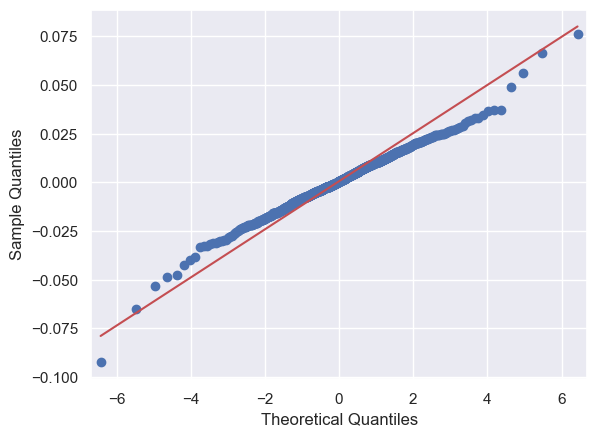

In [31]:
sm.qqplot(sbux['return'].dropna(), dist=my_student_t(degFreedom), line='s');

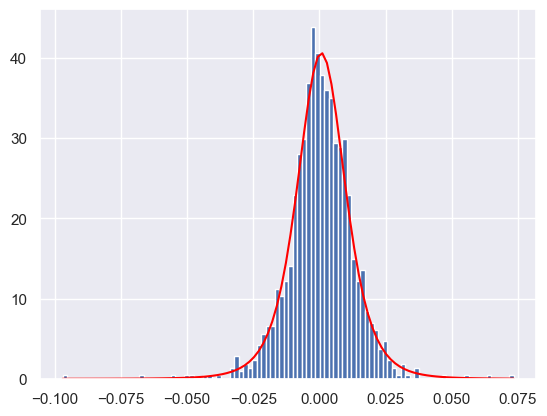

<Figure size 640x480 with 0 Axes>

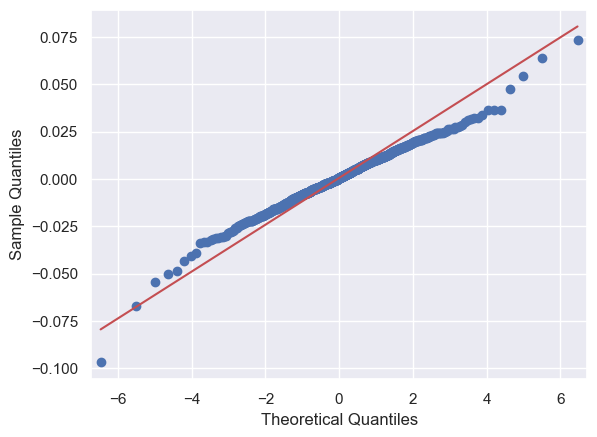

In [32]:
# Repeat above for log_returns

# Generate a t-distribution
x = np.linspace(sbux['log_returns'].min(), sbux['log_returns'].max(), 100)

params = student_t.fit(sbux['log_returns'].dropna())
degFreedom, loc, scale = params

y = student_t.pdf(x, df=degFreedom, loc=loc, scale=scale)

# Plot the histogram
plt.figure()
sbux['log_returns'].hist(bins=100, density=True)
plt.plot(x, y, color='red')

# Plot the QQ-plot
plt.figure()
sm.qqplot(sbux['log_returns'].dropna(), dist=my_student_t(degFreedom), line='s');

# Skewness And Kurtosis

In [33]:
# Calculate the skewness and excess kurtosis
print(sbux['return'].skew(), sbux['return'].kurtosis())

-0.2680784195824153 5.593158903424731


In [34]:
# Calculate the skewness and excess kurtosis for log_returns
print(sbux['log_returns'].skew(), sbux['log_returns'].kurtosis())

-0.41015501490182066 5.964502225799283


In [35]:
# Calculate the skewness and excess kurtosis for 10000 random samples from a normal distribution
x = pd.Series(np.random.randn(10000))
print(x.skew(), x.kurtosis())

-0.02740699568512392 0.027023999147259392


# Confidence Intervals

In [36]:
values = sbux['return'].dropna().to_numpy()

In [37]:
# Calculate the mean and standard deviation
m = values.mean()
s = values.std()

In [40]:
# Calculate the confidence internvals
lower = m - 1.96 * s / np.sqrt(len(values))
upper = m + 1.96 * s / np.sqrt(len(values))

print(lower, m, upper)

-8.25681081270919e-05 0.0006002332205830914 0.0012830345492932747


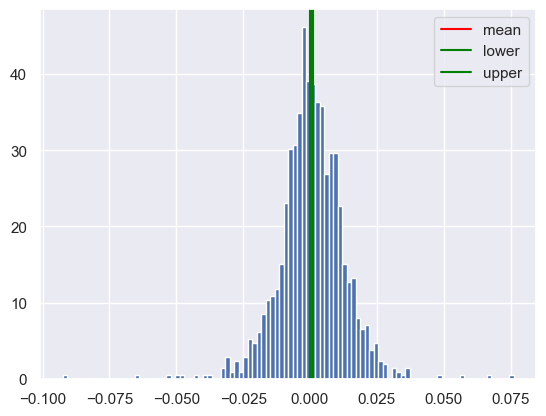

In [39]:
# Plot the confidence intervals on top of the histograms
sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label='mean', color='red')
plt.axvline(lower, label='lower', color='green')
plt.axvline(upper, label='upper', color='green')
plt.legend()

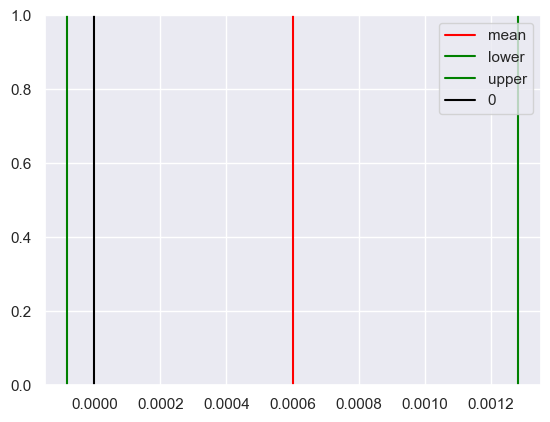

In [42]:
plt.axvline(m, label='mean', color='red')
plt.axvline(lower, label='lower', color='green')
plt.axvline(upper, label='upper', color='green')
plt.axvline(0, label='0', color='black')
plt.legend()

# Statistical Testing

In [43]:
from scipy.stats import jarque_bera, normaltest, kstest, ttest_1samp

## Tests for Normality

### Jarque-Bera

In [45]:
print(jarque_bera(values))
print(jarque_bera(sbux['log_returns'].dropna().to_numpy()))

SignificanceResult(statistic=1639.028438655224, pvalue=0.0)
SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)


We can reject the null hyothesys of normally distributed data

### Normal Test

In [46]:
print(normaltest(values))
print(normaltest(sbux['log_returns'].dropna().to_numpy()))

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)
NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)


We can reject the null hyothesys of normally distributed data

### Kolmogorov–Smirnov

In [47]:
params = student_t.fit(values)
degFreedom, loc, scale = params

def cdf(x):
    return student_t.cdf(x, df=degFreedom, loc=loc, scale=scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063, statistic_location=-0.0003257859586252021, statistic_sign=1)

We can not reject the null hyothesys of t-distributed data

In [48]:
params = student_t.fit(sbux['log_returns'].dropna().to_numpy())
degFreedom, loc, scale = params

def cdf(x):
    return student_t.cdf(x, df=degFreedom, loc=loc, scale=scale)

kstest(values, cdf)

KstestResult(statistic=0.018377769605553596, pvalue=0.7819492804308994, statistic_location=-0.0003257859586252021, statistic_sign=1)

### One-Sample T-Test

In [49]:
ttest_1samp(values, 0)

TtestResult(statistic=1.7223010261810556, pvalue=0.08526098717694539, df=1257)

We cannot reject the null hypothesys of true mean = 0

In [51]:
ttest_1samp(sbux['log_returns'].dropna(), 0)

TtestResult(statistic=1.4999195047533647, pvalue=0.13388636615667793, df=1257)

### Let us try another stock - MMM

0.0007001182500580143 0.009768718404053094
0.0001605072466054154 0.0012397292535106133


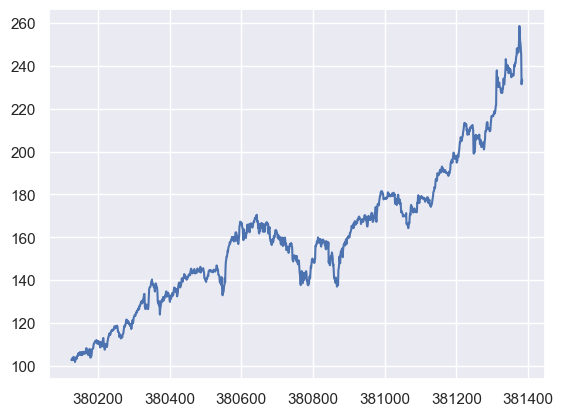

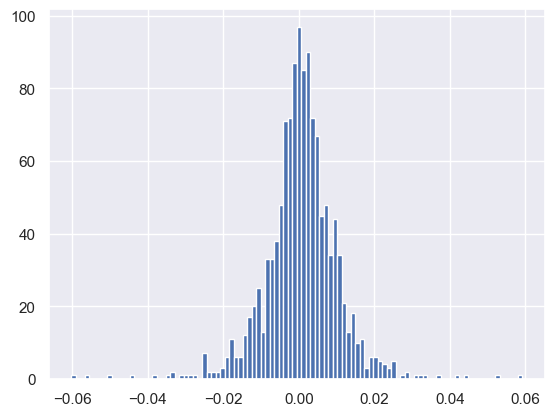

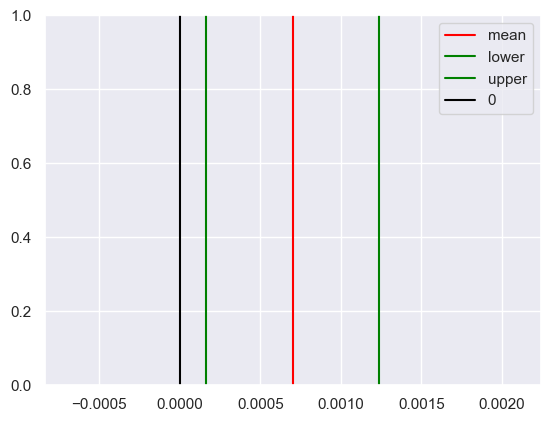

In [58]:
mmm = data[data['Name']=='MMM'].copy()

plt.figure()
mmm['close'].plot()

mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_returns'] = np.log(mmm['return'] + 1)

plt.figure()
mmm['return'].hist(bins=100);
m_mmm = mmm['return'].mean()
s_mmm = mmm['return'].std()
print(m_mmm, s_mmm)

low_mmm = m_mmm - 1.96 * s_mmm / np.sqrt(len(mmm))
high_mmm = m_mmm + 1.96 * s_mmm / np.sqrt(len(mmm))
print(low_mmm, high_mmm)

plt.figure()
plt.axvline(m_mmm, label='mean', color='red')
plt.axvline(low_mmm, label='lower', color='green')
plt.axvline(high_mmm, label='upper', color='green')
plt.axvline(0, label='0', color='black')
plt.xlim([low_mmm - 0.001, high_mmm + 0.001])
plt.legend()



In [59]:
ttest_1samp(mmm['return'].dropna(), 0)

TtestResult(statistic=2.541991701703365, pvalue=0.011141496531324404, df=1257)

In [60]:
ttest_1samp(mmm['log_returns'].dropna(), 0)

TtestResult(statistic=2.365963115873947, pvalue=0.018134246809755054, df=1257)

In this case, we can reject the null hypothesis of true mean = 0

# Correlation and Covariance

## Get some more data

In [61]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv # download some more data

File ‘sp500_close.csv’ already there; not retrieving.



In [63]:
close = pd.read_csv('sp500_close.csv')

In [64]:
# We select a subset of the data
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [65]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130


In [66]:
sub.dropna(axis=0, how='all', inplace=True)

In [67]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [68]:
# Calculate the returns for each symbol and store them in a new dataframe called returns

for symbol in symbols:
    sub[symbol + '_prev'] = sub[symbol].shift(1)
    sub[symbol + '_return'] = sub[symbol] / sub[symbol + '_prev'] - 1

returns = sub[[symbol + '_return' for symbol in symbols]].copy()
returns.head()

,AAPL_return,GOOG_return,IBM_return,NFLX_return,SBUX_return
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


## Calculate Relevant Statistics

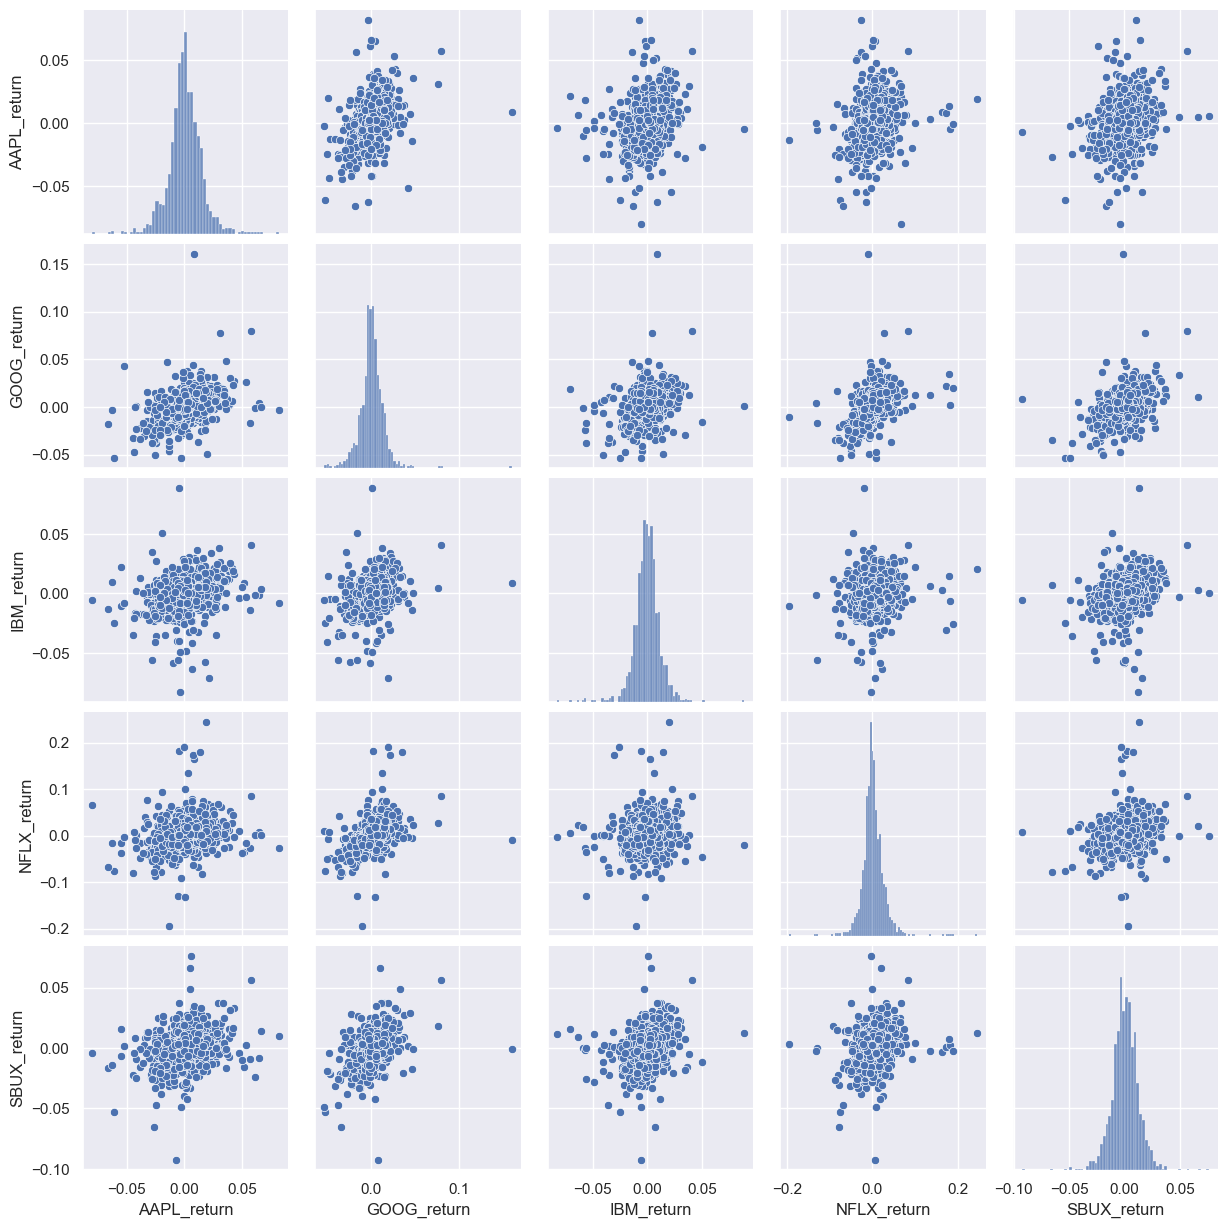

In [69]:
sns.pairplot(returns); # plot a scatter matrix

In [70]:
returns.mean()

AAPL_return    0.000786
GOOG_return    0.000745
IBM_return    -0.000144
NFLX_return    0.002217
SBUX_return    0.000600
dtype: float64

In [71]:
returns.std()

AAPL_return    0.014593
GOOG_return    0.014069
IBM_return     0.011876
NFLX_return    0.027353
SBUX_return    0.012361
dtype: float64

Text(0, 0.5, 'Expected Return (mean)')

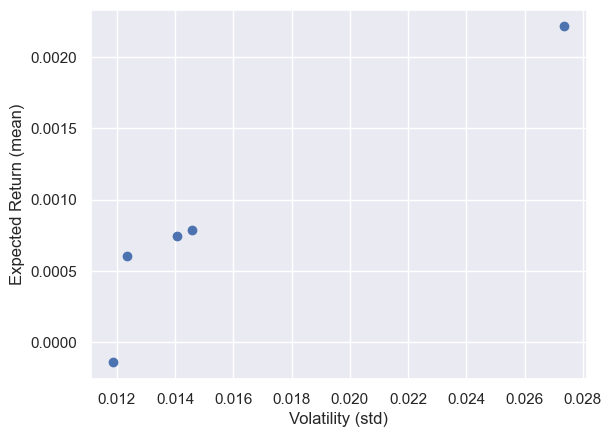

In [72]:
# Plot the mean and standard deviation of the returns for each symbol as a scatter plot with the standard deviation on the x-axis and the mean on the y-axis
# When volatility is high, the expected return is high

plt.scatter(returns.std(), returns.mean())
plt.xlabel('Volatility (std)')
plt.ylabel('Expected Return (mean)')

In [73]:
returns.corr()

,AAPL_return,GOOG_return,IBM_return,NFLX_return,SBUX_return
AAPL_return,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_return,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_return,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_return,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_return,0.307716,0.455936,0.315263,0.266012,1.000000


In [74]:
returns.cov()

,AAPL_return,GOOG_return,IBM_return,NFLX_return,SBUX_return
AAPL_return,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_return,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_return,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_return,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_return,0.000056,0.000079,0.000046,0.000090,0.000153


# Alpha and Beta - Linear Regression

## Get some more data

In [75]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2023-02-24 18:11:07--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.02s   

2023-02-24 18:11:08 (12.7 MB/s) - ‘SPY.csv’ saved [251935/251935]

File ‘sp500sub.csv’ already there; not retrieving.



In [77]:
spy = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [78]:
spy['SPY_return'] = spy['Close'].pct_change(1)
spy.head()

,Open,High,Low,Close,Adj Close,Volume,SPY_return
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002647
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004221
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003328


In [80]:
index = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
aapl = index[index['Name']=='AAPL'].copy()
aapl['AAPL_return'] = aapl['Close'].pct_change(1)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Name,AAPL_return
Date,,,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400.0,AAPL,NaN
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200.0,AAPL,0.001729
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000.0,AAPL,-0.015906
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800.0,AAPL,-0.001849
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700.0,AAPL,0.006648


In [81]:
joined = aapl[['AAPL_return']].join(spy[['SPY_return']], how='inner')
joined.head()

,AAPL_return,SPY_return
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


## Calculate statistics

<Axes: xlabel='Date'>

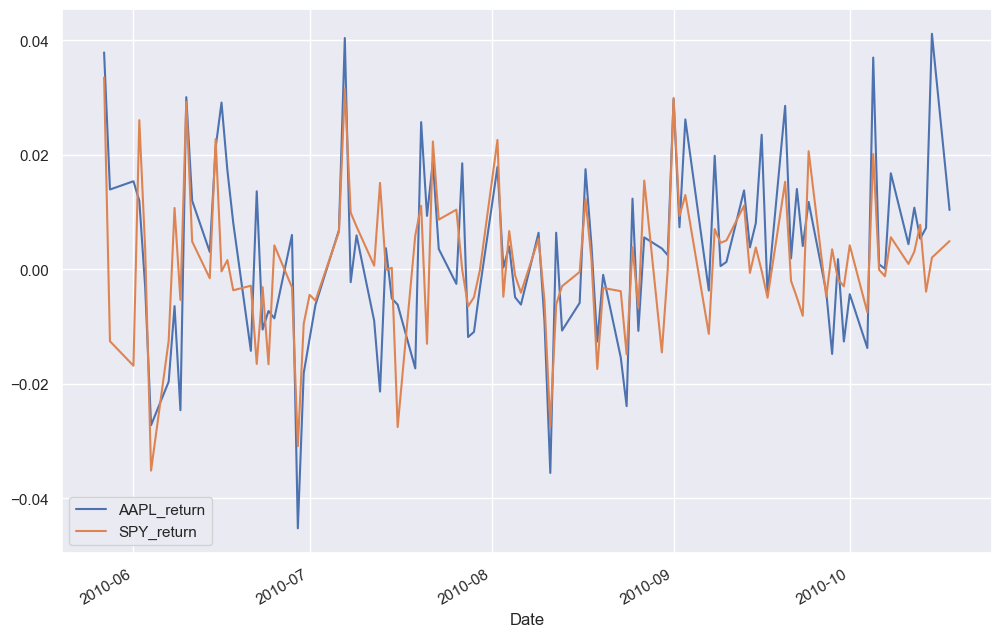

In [85]:
joined.iloc[100:200].plot(figsize=(12, 8))

<Axes: xlabel='SPY_return', ylabel='AAPL_return'>

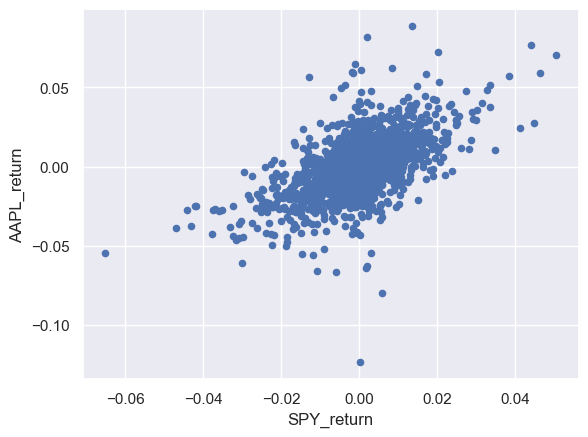

In [88]:
joined.plot.scatter(x='SPY_return', y='AAPL_return')

In [95]:
# Make a linear regression dataset
joined.dropna(inplace=True)
X = joined['SPY_return'].values.reshape(-1, 1)
Y = joined['AAPL_return'].values.reshape(-1, 1)

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

Text(0, 0.5, 'AAPL')

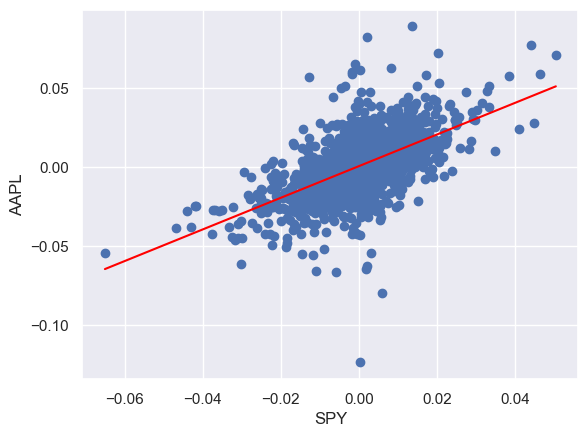

In [99]:
# Plot the data and the regression line on top of it

x_predict = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)
y_predict = model.predict(x_predict)

plt.scatter(X, Y)
plt.plot(x_predict, y_predict, color='red')
plt.xlabel('SPY')
plt.ylabel('AAPL')

In [100]:
# Print the coefficients and intercept of the model (y = beta * x + alpha) 

beta = model.coef_
alpha = model.intercept_
print(beta, alpha)

[[0.99836387]] [0.00046298]


In [101]:
# Calculate the correlation coefficient between the two returns

from scipy.stats import pearsonr
print(pearsonr(joined['SPY_return'], joined['AAPL_return']))

PearsonRResult(statistic=0.5811322650641099, pvalue=1.742451523214489e-204)


In [102]:
# Determine the volatility of the data
joined.std()

AAPL_return    0.016201
SPY_return     0.009430
dtype: float64

In [103]:
joined['AAPL_return'].std() / joined['SPY_return'].std()

1.7179632360403783

# Mixture of Gaussians / Gaussian Mixture Model (GMM) for modelling returns

In [104]:
from sklearn.mixture import GaussianMixture

## Intuitive Demonstration of GMM

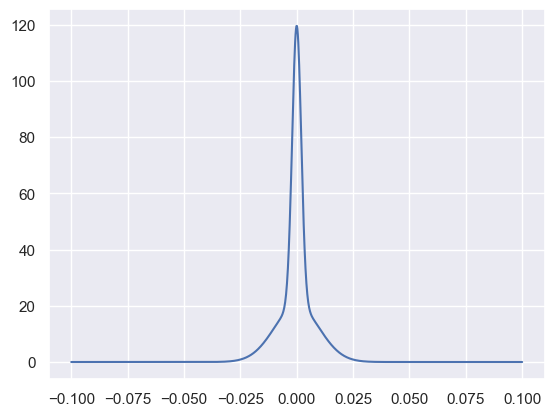

In [105]:
x_list = np.linspace(-0.1, 0.1, 1000)

# Generate PDF for an arbitrary distribution
p = 0.5 # mixture proportion
fx = p * norm.pdf(x_list, loc=0, scale=0.01) + (1 - p) * norm.pdf(x_list, loc=0, scale=0.002) # same mean, different std

plt.plot(x_list, fx)

In [106]:
# Check the kurtosis
# Generate samples from the distribution and check the sample kurtosis of thosse samples

samples = []
m0, s0, m1, s1 = 0, 0.01, 0, 0.002
for _ in range(5000):
    if np.random.random() < p:
        samples.append(norm.rvs(m0, s0))
    else:
        samples.append(norm.rvs(m1, s1))

series = pd.Series(samples)
series.kurt() # the number is larger than 0, suggesting our samples have heavier tails than the normal distribution

2.469342609510176

## GMM to fit a distribution to stock returns

In [110]:
data = sbux['log_returns'].dropna().to_numpy().reshape(-1, 1)

In [111]:
model = GaussianMixture(n_components=2) # we choose the number of gaussians to 2
model.fit(data)

GaussianMixture(n_components=2)

[0.39011261 0.60988739] [[-0.00047046]
 [ 0.00115943]] [[[2.92811530e-04]]

 [[6.44571023e-05]]]


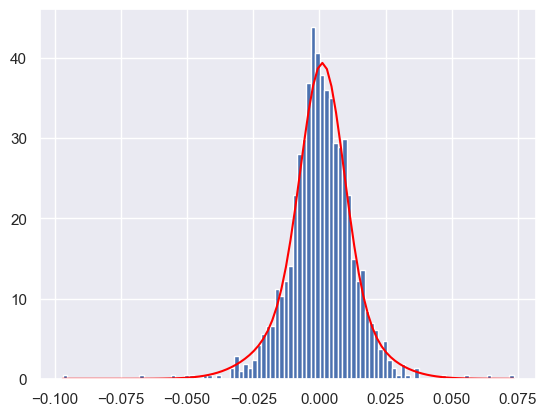

In [114]:
# The parameters of the fitted model are needed for drawing the pdf
weights = model.weights_
means = model.means_
cov = model.covariances_

print(weights, means, cov)

means = means.flatten()
var = cov.flatten()

x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list, loc=means[0], scale=np.sqrt(var[0])) # pdf of the first gaussian
fx1 = norm.pdf(x_list, loc=means[1], scale=np.sqrt(var[1])) # pdf of the second gaussian
fx = weights[0] * fx0 + weights[1] * fx1 # mixture of the two gaussians

# print the pdf  and the histogram of the data
sbux['log_returns'].hist(bins=100, density=True)
plt.plot(x_list, fx, color='red')

Gaussian mixture fits much better than a normal gaussian, capturing the tall head, fat tails of the distribution and the skinny shoulders

# Volatility Clustering

In [115]:
returns.head()

,AAPL_return,GOOG_return,IBM_return,NFLX_return,SBUX_return
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


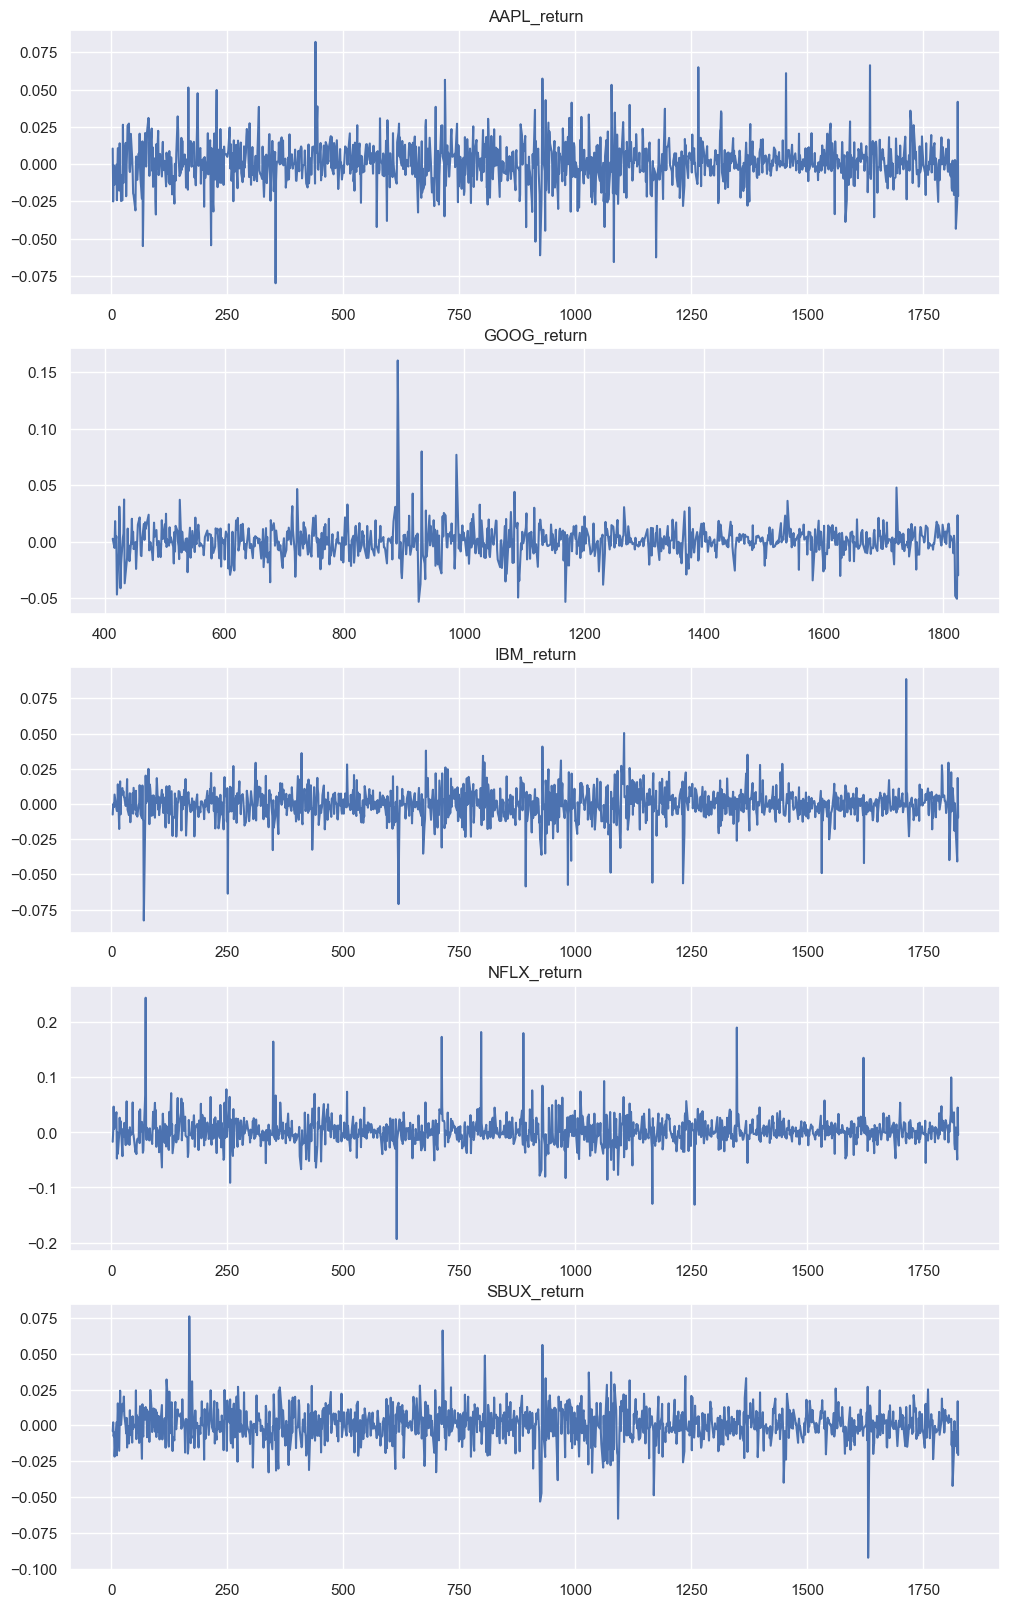

In [121]:
for i, symbol in enumerate(returns.columns):
    plt.subplot(len(returns.columns), 1, i + 1)
    plt.title(symbol)
    returns[symbol].plot(figsize=(12, 20))

# Price Simulation

## Using historical returns

In [122]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,log_returns
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005028


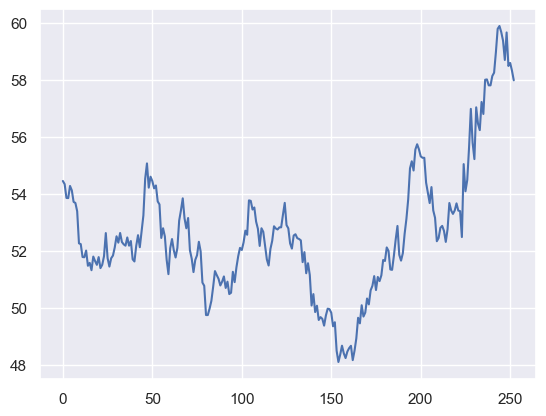

In [124]:
p0 = sbux.iloc[-1]['close']
prices = [p0]
returns = sbux['return'].dropna()
for _ in range(252):
    r = np.random.choice(returns)
    p = prices[-1] * (1 + r)
    prices.append(p)

plt.plot(prices)

## Using a fitted distribution

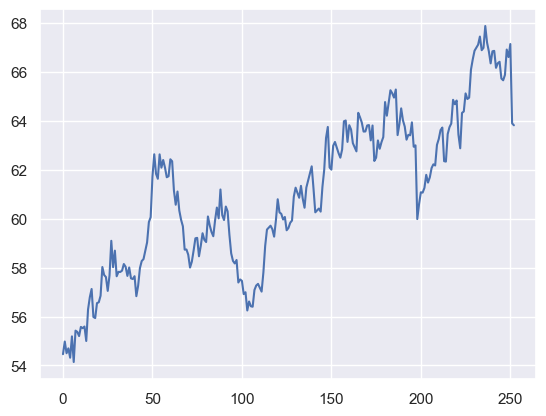

In [126]:
params = student_t.fit(sbux['return'].dropna())
degFreedom, loc, scale = params

p0 = sbux.iloc[-1]['close']
prices = [p0]

for _ in range(252):
    r = student_t.rvs(degFreedom, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

plt.plot(prices)